**This test aims to summarize xrd txt files**

In [1]:
import numpy as np
import os
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
# xrd_dir = "archive_xrd/2"
# crystal_sys_count = np.zeros((8, 1))
# count = 0
# nan_count = 0
# for root, dirs, files in os.walk(xrd_dir):
#     count_all = len(files)
#     for xrd_file in files:
#         if xrd_file.endswith(".txt"):
#             count += 1
#             clear_output(wait = True)
#             print(xrd_file)
#             xrd_file_content = open(root + "/" + xrd_file)
#             xrd_file_lines = xrd_file_content.readlines()
#             for line in xrd_file_lines:
#                 if "nan" in line:
#                     nan_count += 1
#                     print(xrd_file)
#                     break
#             print(count, "/", count_all)
#             xrd_file_content.close()
# print(nan_count, "/", count)

In [3]:
xrd_dir = "archive_xrd"
crystal_sys_count = np.zeros((8, 1))
count = 0
for root, dirs, files in os.walk(xrd_dir):
    count_all = len(files)
    for xrd_file in files:
        if xrd_file.endswith(".txt"):
            count += 1
            clear_output(wait = True)
            print(xrd_file)
            xrd_file_content = open(root + "/" + xrd_file)
            xrd_file_lines = xrd_file_content.readlines()
            crystal_sys = int(xrd_file_lines[1].split()[1])
            crystal_sys_count[crystal_sys - 1, 0] += 1
            crystal_sys_count[7, 0] += 1
            print(count, "/", count_all)
            xrd_file_content.close()

cod_4076061.txt
101964 / 22652


In [4]:
print(crystal_sys_count)

[[ 20626.]
 [ 43418.]
 [ 19736.]
 [  5684.]
 [  3660.]
 [  3859.]
 [  4981.]
 [101964.]]


In [5]:
# Calculate space group
xrd_dir = "archive_xrd"
space_group_count = np.zeros((231, 1))
count = 0
for root, dirs, files in os.walk(xrd_dir):
    count_all = len(files)
    for xrd_file in files:
        if xrd_file.endswith(".txt"):
            count += 1
            clear_output(wait = True)
            print(xrd_file)
            xrd_file_content = open(root + "/" + xrd_file)
            xrd_file_lines = xrd_file_content.readlines()
            space_group = int(float(xrd_file_lines[2].split()[1]))
            space_group_count[space_group - 1, 0] += 1
            space_group_count[230, 0] += 1
            print(count, "/", count_all)
            xrd_file_content.close()
print("Complete!")

cod_4076061.txt
101964 / 22652
Complete!


In [6]:
np.set_printoptions(suppress=True)
print(space_group_count)

[[   896.]
 [ 19730.]
 [    22.]
 [  5673.]
 [   790.]
 [    32.]
 [   419.]
 [   111.]
 [   852.]
 [    54.]
 [   722.]
 [  1141.]
 [   514.]
 [ 28403.]
 [  4685.]
 [     4.]
 [    14.]
 [   332.]
 [  7160.]
 [   120.]
 [    10.]
 [     9.]
 [    13.]
 [     2.]
 [    19.]
 [    37.]
 [     5.]
 [     9.]
 [   710.]
 [    14.]
 [   143.]
 [    21.]
 [  1410.]
 [    35.]
 [    16.]
 [   297.]
 [    15.]
 [    56.]
 [    10.]
 [    49.]
 [    89.]
 [    23.]
 [   162.]
 [    48.]
 [    45.]
 [    34.]
 [   317.]
 [     4.]
 [     4.]
 [    13.]
 [    81.]
 [    80.]
 [    73.]
 [    32.]
 [   215.]
 [   247.]
 [   164.]
 [   198.]
 [   185.]
 [   564.]
 [  2080.]
 [  2810.]
 [   614.]
 [   253.]
 [   154.]
 [    18.]
 [    23.]
 [    21.]
 [    63.]
 [   114.]
 [   240.]
 [    79.]
 [     9.]
 [   170.]
 [    15.]
 [    85.]
 [    11.]
 [    58.]
 [    21.]
 [    15.]
 [    29.]
 [   136.]
 [    17.]
 [    17.]
 [    82.]
 [    86.]
 [   195.]
 [   228.]
 [     1.]
 [     2.]
 [     7.]

In [7]:
space_group_dict = open("space group dictionary.txt")
lines = space_group_dict.readlines()

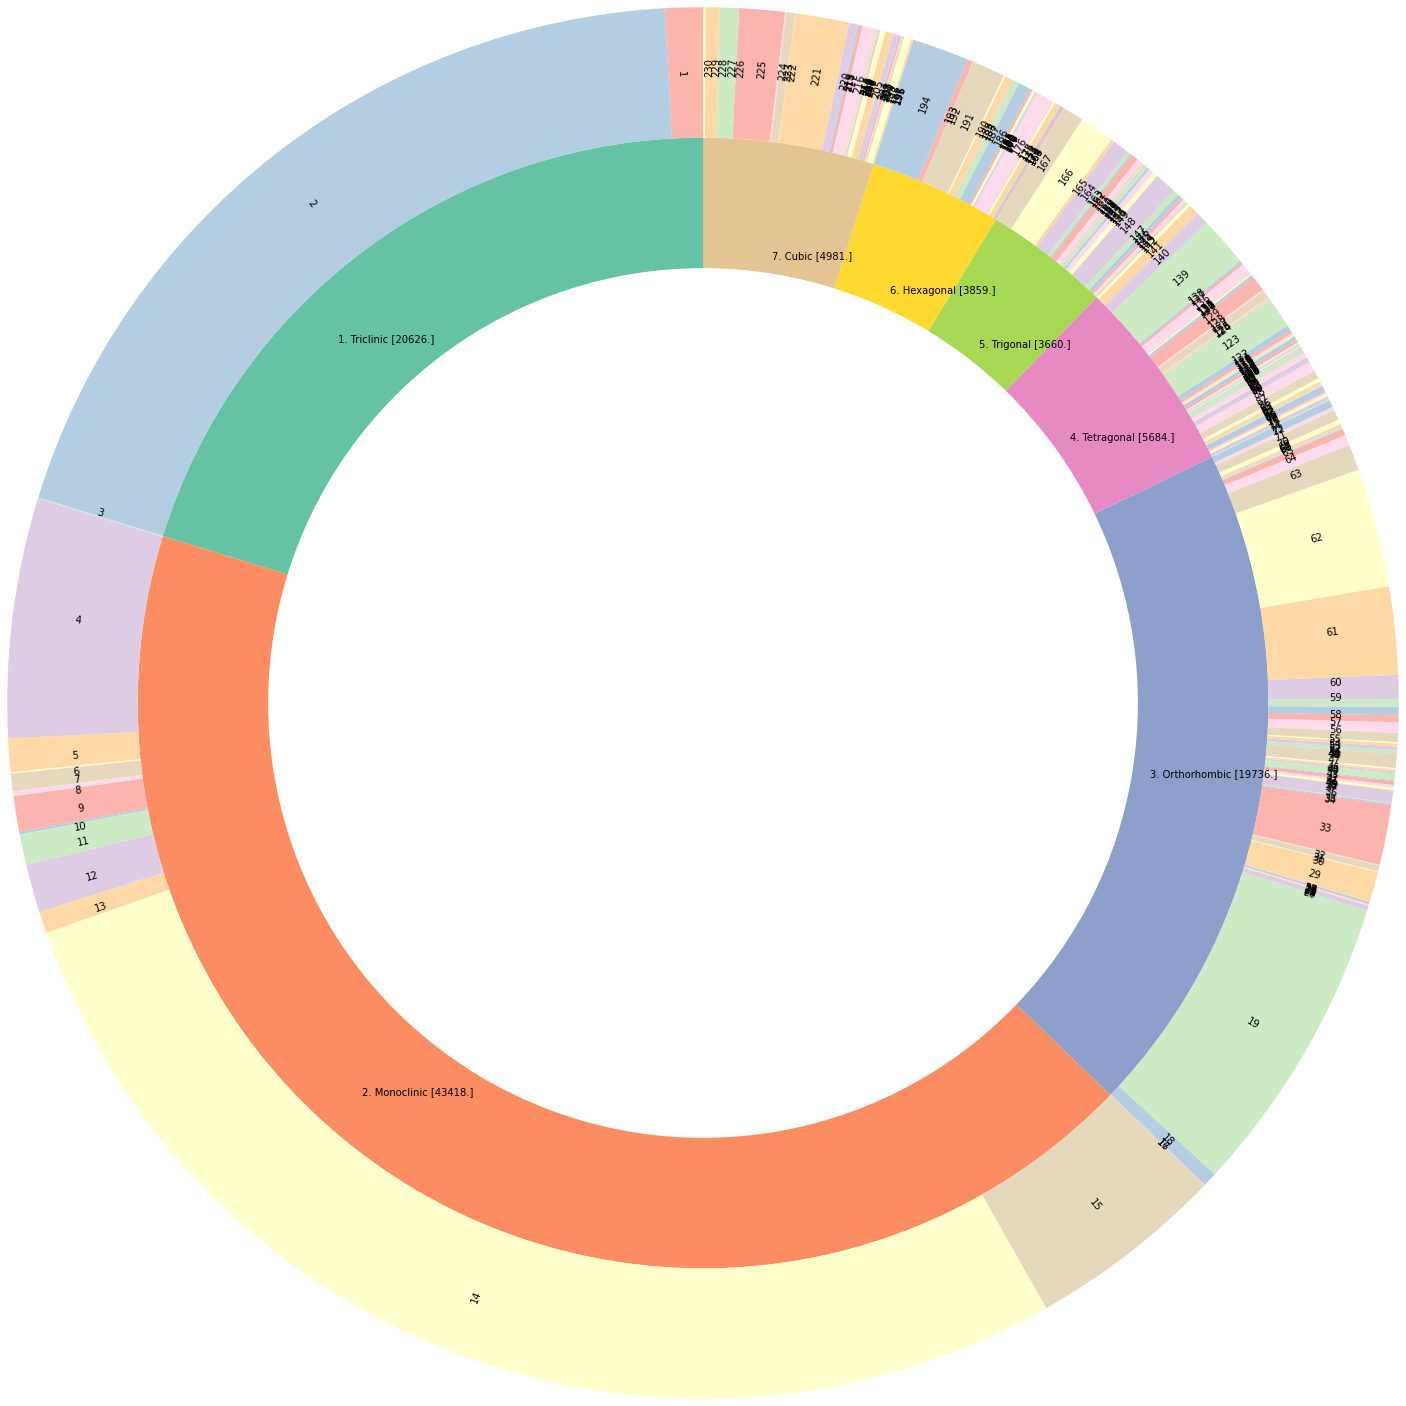

In [9]:
import re
# Setting labels for items in Chart
# Setting size in Chart based on given values
crystal_sys_label = [f'1. Triclinic {crystal_sys_count[0]}', 
                     f'2. Monoclinic {crystal_sys_count[1]}', 
                     f'3. Orthorhombic {crystal_sys_count[2]}', 
                     f'4. Tetragonal {crystal_sys_count[3]}', 
                     f'5. Trigonal {crystal_sys_count[4]}', 
                     f'6. Hexagonal {crystal_sys_count[5]}', 
                     f'7. Cubic {crystal_sys_count[6]}']
crystal_sys_data = crystal_sys_count.T.tolist()[0][0:7]

space_group_label = [re.split(r"[\s]", i, 1)[0] for i in lines]
space_group_data = space_group_count.T.tolist()[0][0:230]

# Create colors
# a, b, c, d ,e, f, g = [plt.cm.Blues, plt.cm.Oranges, plt.cm.Greens, plt.cm.Reds, plt.cm.Purples, plt.cm.Oranges, plt.cm.RdPu]
# crystal_sys_color = [a(0.9), b(0.9), c(0.9), d(0.9), e(0.9), f(0.9), g(0.9)]
# space_group_color = [plt.cm.get_cmap('Greys')]
cmap = plt.cm.get_cmap('Set2')
crystal_sys_color = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7)]
cmap = plt.cm.get_cmap('Pastel1')
sg_color = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7)]

# First Ring (outside)
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('equal')
mypie, a = ax.pie(crystal_sys_data, radius=1.3, startangle=90, 
                  labels=crystal_sys_label, 
                  colors=crystal_sys_color, 
                  labeldistance=0.8,
                 rotatelabels=False
                 )
plt.setp(mypie, width=0.3)
 
# Second Ring (Inside)
mypie2, a = ax.pie(space_group_data, radius=1.3+0.3, startangle=90, colors = sg_color,
                   labels=space_group_label, 
                   labeldistance=0.9, 
                   rotatelabels=True
                  # colors=[round(float(i), 3) for i in space_group_color],
                  )
plt.setp(mypie2, width=0.3)
plt.margins(0,0)
 
# show it

plt.show()

In [ ]:
0:2, 2:15, 15:74, 74:142, 142:167, 167:194, 194:230

In [ ]:
a, b, c, d ,e, f, g = [plt.cm.Blues, plt.cm.Oranges, plt.cm.Greens, plt.cm.Reds, plt.cm.Purples, plt.cm.Oranges, plt.cm.RdPu]
crystal_sys_color = [a(0.5), b(0.5), c(0.5), d(0.5), e(0.5), f(0.5), g(0.5)]
sg_color = []
for i in range(0, 2):
    sg_color.append(a(space_group_color[i]))
for i in range(2, 15):
    sg_color.append(b(space_group_color[i]))
for i in range(15, 74):
    sg_color.append(c(space_group_color[i]))
for i in range(74, 142):
    sg_color.append(d(space_group_color[i]))
for i in range(142, 167):
    sg_color.append(e(space_group_color[i]))
for i in range(167, 194):
    sg_color.append(f(space_group_color[i]))
for i in range(194, 230):
    sg_color.append(g(space_group_color[i]))
print(sg_color)

In [ ]:
space_group_color = []
space_group_color[1:] = np.linspace(0.1,0.9,3-1).tolist()
space_group_color[3:] = np.linspace(0.1,0.9,16-3).tolist()
space_group_color[16:] = np.linspace(0.1,0.9,75-16).tolist()
space_group_color[75:] = np.linspace(0.1,0.9,143-75).tolist()
space_group_color[143:] = np.linspace(0.1,0.9,168-143).tolist()
space_group_color[168:] = np.linspace(0.1,0.9,195-168).tolist()
space_group_color[195:] = np.linspace(0.1,0.9,231-195).tolist()
print(space_group_color)